In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

In [2]:
%matplotlib inline

In [3]:
a = np.array([[1, 2], [9, 0], [0, 12]])
a

array([[ 1,  2],
       [ 9,  0],
       [ 0, 12]])

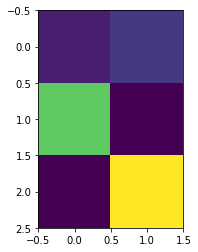

In [4]:
plt.imshow(a, interpolation='nearest')

# Neural Network

Open the next cell to see the sense

w11  w21 w31 w41 ....
w12
w13
w14          wnn    
...

In [5]:
class Neural_network:
    def __init__(self, in_nodes, hidden_nodes, out_nodes, lr=0.3):
        self.in_nodes = in_nodes
        self.h_nodes = hidden_nodes
        self.out_nodes = out_nodes
        
        self.lr = lr
        self.activation_function = lambda x: scipy.special.expit(x)
        
        self.w_input_hidden = np.random.rand(self.h_nodes, self.in_nodes) - 0.5
        self.w_hidden_output = np.random.rand(self.out_nodes, self.h_nodes) - 0.5
        
    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        
        hidden_inputs = np.dot(self.w_input_hidden, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = np.dot(self.w_hidden_output, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        
        output_errors = targets - final_outputs
        
        hidden_errors = np.dot(self.w_hidden_output.T, output_errors)
        
        
        self.w_hidden_output += self.lr * np.dot((output_errors * final_outputs * (1 - final_outputs)), 
                                                 (hidden_outputs.T))
        
        self.w_input_hidden += self.lr * np.dot((hidden_errors * hidden_outputs  * (1 - hidden_outputs)), 
                                                 (inputs.T))
    
    def out(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.w_input_hidden, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = np.dot(self.w_hidden_output, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
    
# A heuristic for improving weights inizialization
# self.wih = np.random.normal(0.0, pow(self.h_nodes, -0.5), (self.h_nodes, self.in_nodes))
# self.who = np.random.normal(0.0, pow(self.out_nodes, -0.5), (self.out_nodes, self.h_nodes))


In [6]:
n_net = Neural_network(3,3,3, 0.3)

In [7]:
print(n_net.w_input_hidden)
print('====')
print(n_net.w_hidden_output)

[[ 0.435663   -0.22975869 -0.10954509]
 [-0.02230814 -0.33108009  0.38706768]
 [-0.37091315 -0.41778986  0.31662287]]
====
[[ 0.18579176 -0.49979708  0.44821791]
 [-0.05415374 -0.271813   -0.21372623]
 [ 0.37562497 -0.44034822 -0.31510535]]


In [8]:
np.array([1, 2, 3, 4], ndmin=2).T

array([[1],
       [2],
       [3],
       [4]])

In [9]:
n_net.out([1.0, 0.5, -1.5]) * n_net.out([1.0, 0.5, -1.5])

array([[0.26842842],
       [0.2083015 ],
       [0.25290546]])

In [10]:
np.array([2,3,3]) * np.array([2,3,3])

array([4, 9, 9])

In [33]:
data_imgs = open('./mnist_train_100.csv')
data_list = data_imgs.readlines()
data_imgs.close()

In [35]:
img = data_list[0].split(',')[1:]

In [36]:
img_array = np.asfarray(img).reshape((28, 28))

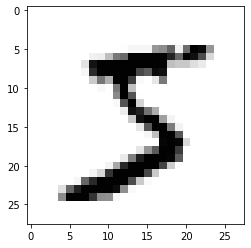

In [37]:
plt.imshow(img_array, cmap='Greys', interpolation='None')

In [39]:
scaled_input = np.asfarray(img) / 255 * 0.99 + 0.01

In [41]:
scaled_input

array([0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01   

In [94]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

lr = 0.3
net = Neural_network(input_nodes, hidden_nodes, output_nodes, lr)

In [95]:

with open('./mnist_train.csv', 'r') as f:
    training_data_list = f.readlines()

In [99]:
for record in training_data_list[1:]:
    all_values = record.split(',')
    inputs = np.asfarray(all_values[1:]) / 255 * 0.99 + 0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    
    net.train(inputs, targets)

In [104]:
with open('./mnist_test.csv', 'r') as f:
    test_data_list = f.readlines()
    test_data_list = test_data_list[1:]

In [105]:
all_values = test_data_list[0].split(',')

In [106]:
print(all_values[0])

7


In [107]:
image_array = np.asfarray(all_values[1:]).reshape((28, 28))

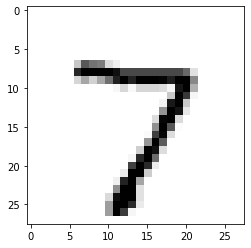

In [108]:
plt.imshow(image_array, cmap='Greys', interpolation='None')

In [110]:
net.out(np.asfarray(all_values[1:]) / 255 * 0.99 + 0.01)

array([[7.70243249e-03],
       [2.70185901e-03],
       [1.79698230e-02],
       [1.02625661e-03],
       [1.31100660e-03],
       [4.53481897e-04],
       [5.04304086e-03],
       [9.97086073e-01],
       [1.00729142e-03],
       [1.19252090e-02]])

In [112]:
scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    
    inputs = np.asfarray(all_values[1:]) / 255 * 0.99 + 0.01
    outputs = net.out(inputs)
    out_label = np.argmax(outputs)
    # print(f'The net answer is: {out_label}, The correct answer is: {correct_label}')
    
    if out_label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)
        
        
print(f'\nAccuracy of the network is {scorecard.count(1) / len(scorecard)}')


Accuracy of the network is 0.9376
